https://snap.stanford.edu/data/feather-deezer-social.html

Download the dataset from the above link and put it in the data folder.

In [1]:
import networkx as nx
import pandas as pd

data_path = "datasets/deezer_europe/deezer_europe_edges.csv"

# Charger les arêtes depuis un fichier CSV
edges_df = pd.read_csv( data_path )  # Assurez-vous que ce fichier est dans votre répertoire

# Construire le graphe
G = nx.from_pandas_edgelist(edges_df, source="node_1", target="node_2")

print(f"Nombre de nœuds : {G.number_of_nodes()}")
print(f"Nombre d’arêtes : {G.number_of_edges()}")


Nombre de nœuds : 28281
Nombre d’arêtes : 92752


Notre Graph est plutôt large; certains algorithmes avec des complexités élevées, comme celles qui doivent calculer des plus courts chemins peuvent être très lents.

80% des nœuds ont un degré <= 10
Degré minimum : 1
Degré maximum : 172
Degré moyen : 6.56


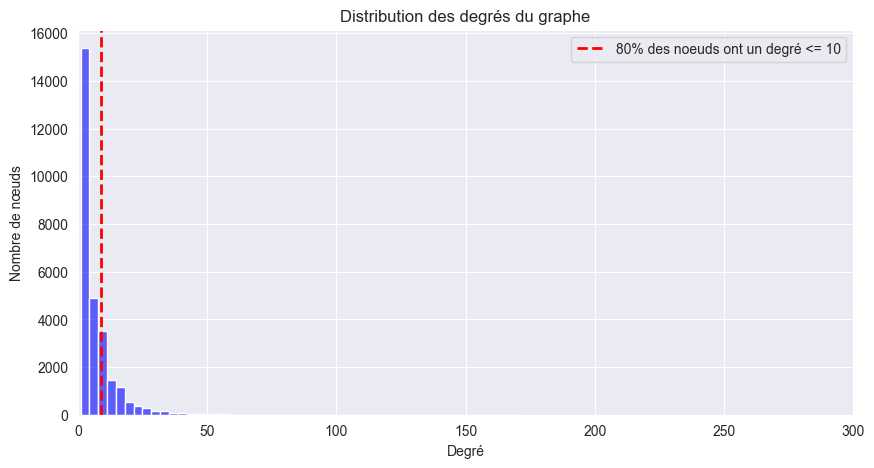

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer les degrés de chaque nœud
degrees = [deg for _, deg in G.degree()]

# Calcul de 80% des valeurs
degrees = np.array(degrees)
degrees_sorted = np.sort(degrees)
unique_degree, count_degree = np.unique(degrees_sorted, return_counts=True)
cumulative_percentage = np.cumsum(count_degree) / len(degrees)
idx_80 = np.argmax(cumulative_percentage >= 0.8)
print(f"80% des nœuds ont un degré <= {unique_degree[idx_80]}")

# Afficher quelques statistiques
print(f"Degré minimum : {min(degrees)}")
print(f"Degré maximum : {max(degrees)}")
print(f"Degré moyen : {np.mean(degrees):.2f}")

# Version seaborn
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.histplot(degrees, bins=50, color='blue', log_scale=False, alpha=0.6)
plt.axvline(x=idx_80, color='red', linestyle='--', linewidth=2, label = f"80% des noeuds ont un degré <= {unique_degree[idx_80]}")
plt.xlim(0, 300)
plt.xlabel("Degré")
plt.ylabel("Nombre de nœuds")
plt.title("Distribution des degrés du graphe")
plt.legend()
plt.show()

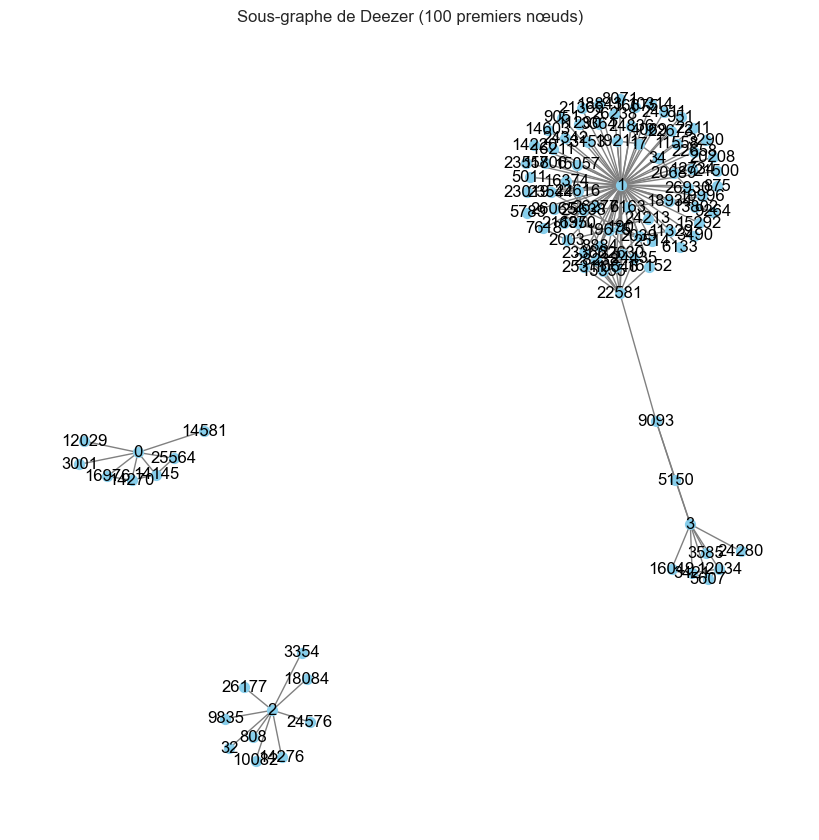

In [3]:
# Extraire un sous-graphe (par exemple les 100 premiers nœuds)
nodes_sample = list(G.nodes)[:100]
H = G.subgraph(nodes_sample)

# Visualiser ce sous-graphe
plt.figure(figsize=(8, 8))
nx.draw(H, with_labels=True, node_size=50, node_color='skyblue', edge_color='gray')
plt.title("Sous-graphe de Deezer (100 premiers nœuds)")
plt.show()

Cette représentation est très biaisée : on a pris les arêtes dans l'ordre, et donc on trace premièrement celle de 0, 1, 2, 3 et donc ils paraissent très centraux comparé aux autres noeuds.

 degree centrality done 
 eigenvector centrality done 
 pagerank centrality done 


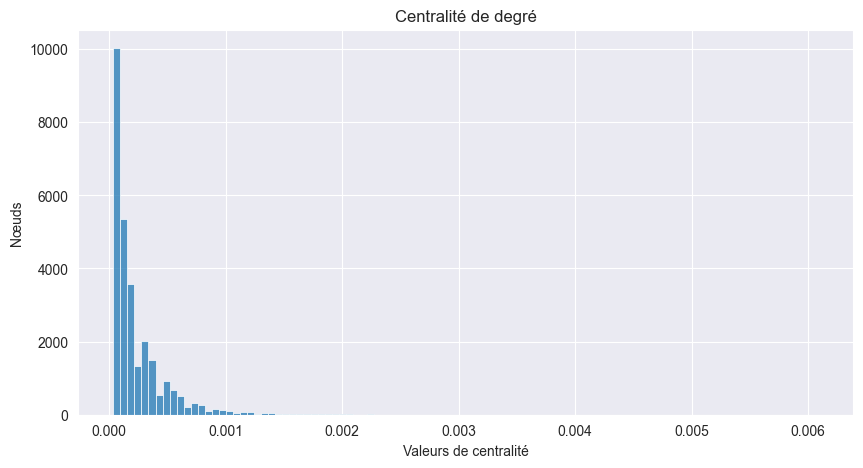

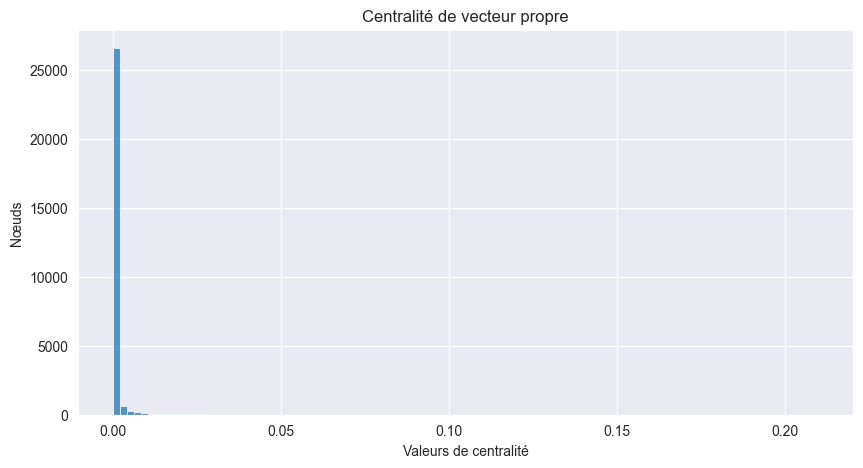

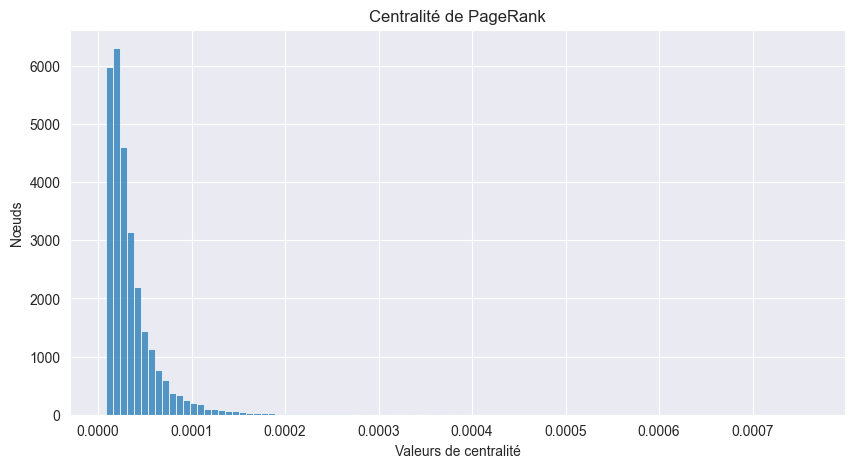

In [20]:
from matplotlib import pyplot as plt
# Centralité de degré
degree_centrality = nx.degree_centrality(G)
print( " degree centrality done " )

# Centralité de proximité
#closeness_centrality = nx.closeness_centrality(G)
#print( " closeness centrality done " )

# Centralité d’intermédiarité
#betweenness_centrality = nx.betweenness_centrality(G)
#print( " betweenness centrality done " )

# Centralité de vecteur propre
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
print( " eigenvector centrality done " )

# Centralité de PageRank
pagerank_centrality = nx.pagerank(G)
print( " pagerank centrality done " )

# Afficher quelques valeurs pour chaque centralité

# Diagramme en bâtons pour la centralité de degré
plt.figure(figsize=(10, 5))
sns.histplot(list(degree_centrality.values()), bins = 100)
plt.title("Centralité de degré")
plt.ylabel("Nœuds")
plt.xlabel("Valeurs de centralité")
plt.show()


# Diagramme en bâtons pour la centralité de vecteur propre
plt.figure(figsize=(10, 5))
sns.histplot( list(eigenvector_centrality.values()), bins=100)
plt.title("Centralité de vecteur propre")
plt.ylabel("Nœuds")
plt.xlabel("Valeurs de centralité")
plt.show()

# Diagramme en bâtons pour la centralité de PageRank
plt.figure(figsize=(10, 5))
sns.histplot(list(pagerank_centrality.values()), bins=100)
plt.title("Centralité de PageRank")
plt.ylabel("Nœuds")
plt.xlabel("Valeurs de centralité")
plt.show()


Comparé à Pagerank, la centraité de vecteur propre est peu répartie et donc ne donne pas une bonne idée de la centralité des noeuds, ainsi que celle de degrée, qui elle est moins bien répartie comparé à Pagerank; qui semble plutôt fluide au sein du graphe.

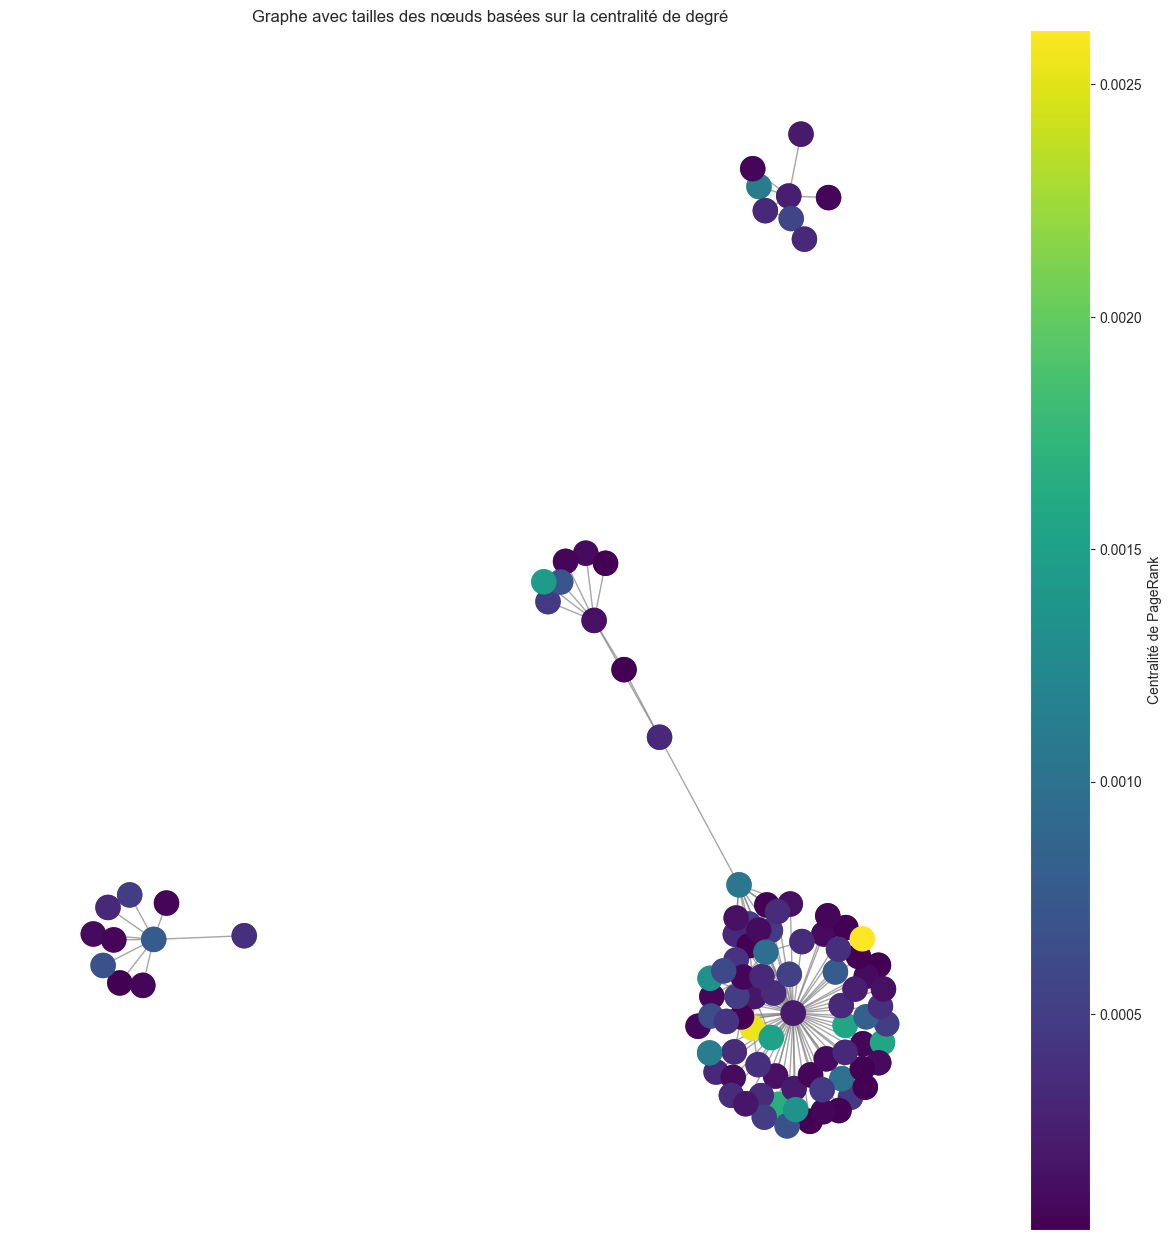

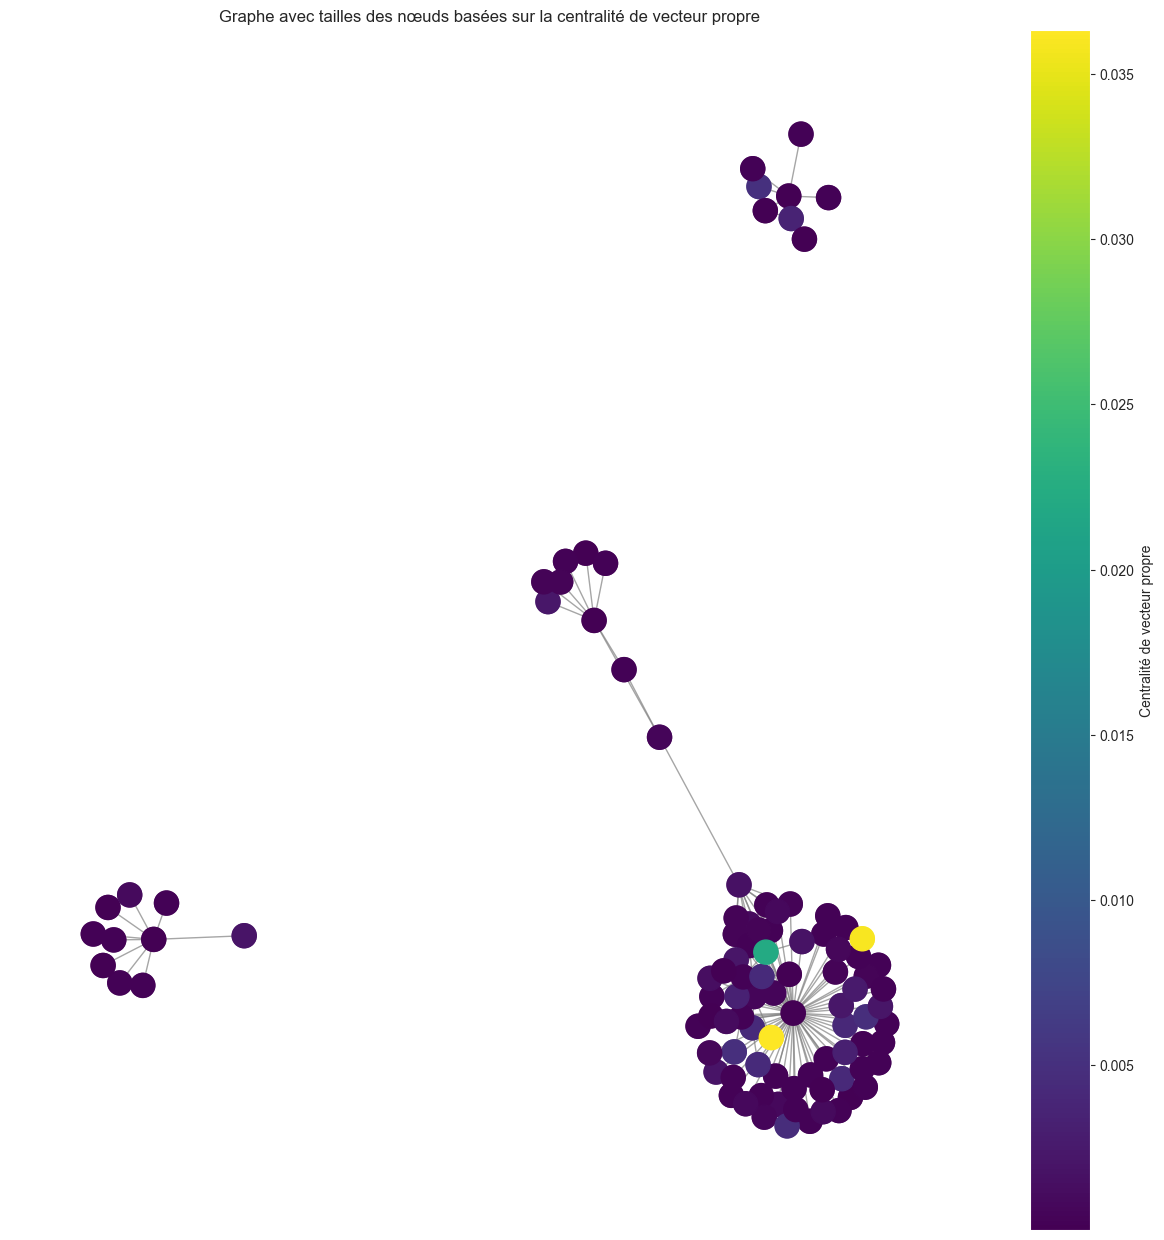

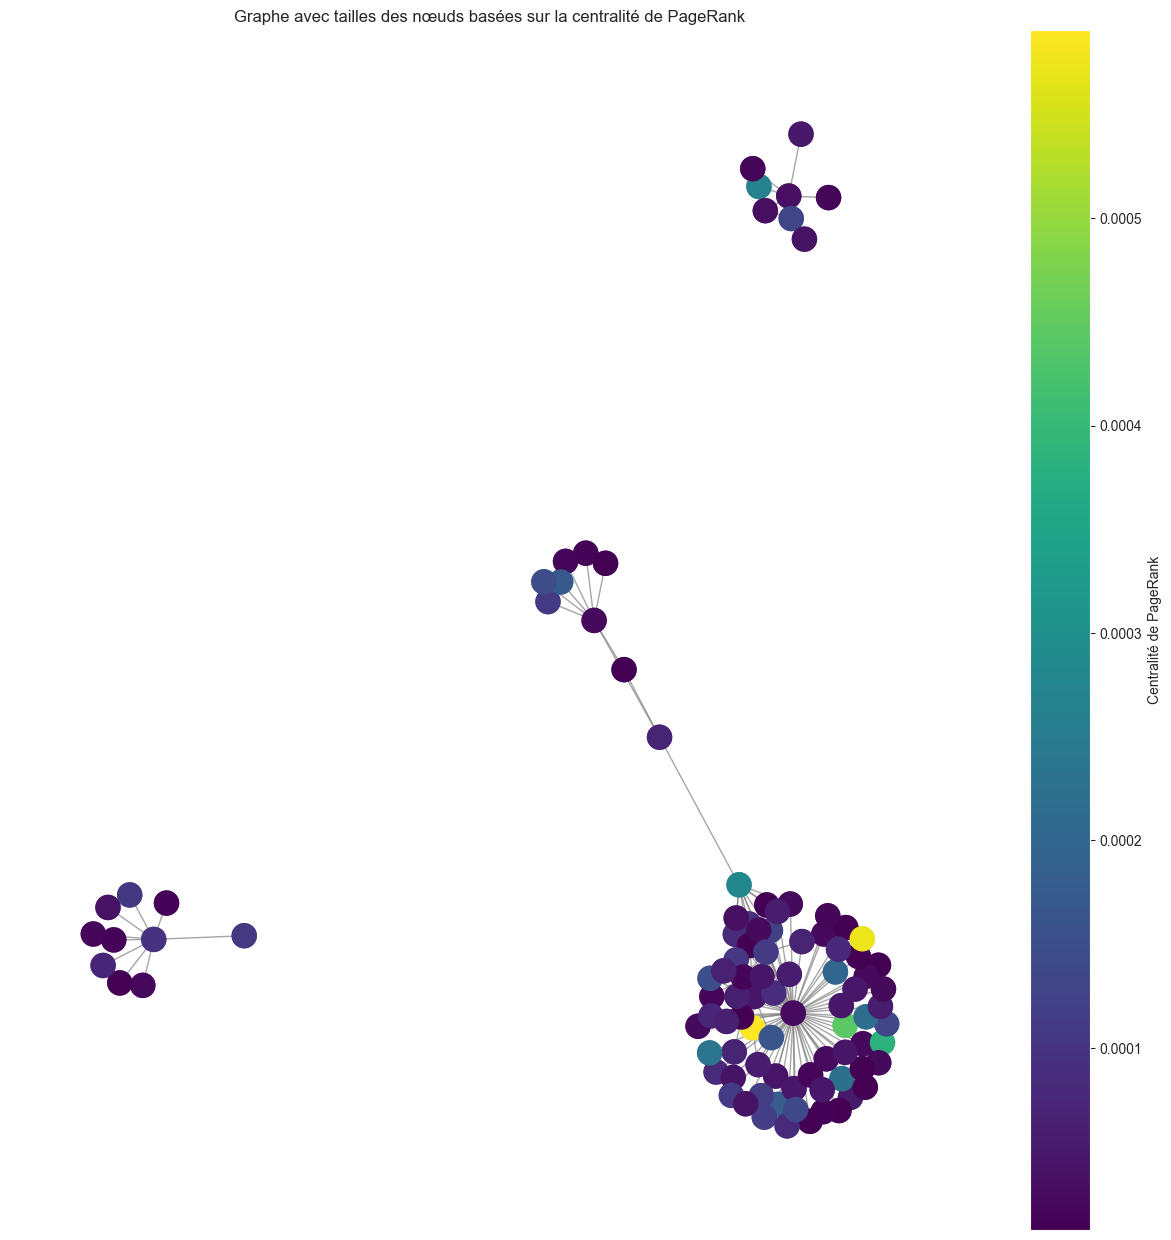

In [47]:
# Tracer le graphe avec les tailles des nœuds basées sur la centralité de degré
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(H, seed=42)  # Disposition des nœuds
nodes = nx.draw(
    H,
    pos,
    with_labels=False,
    node_color=list(degree_centrality.values())[:100],
    cmap=plt.cm.viridis,
    edge_color="gray",
    alpha=0.7
)
sc = nx.draw_networkx_nodes(H, pos, node_color=list(degree_centrality.values())[:100], cmap='viridis', node_size=300)
# Add colorbar
plt.colorbar(sc, label="Centralité de PageRank") 
plt.title("Graphe avec tailles des nœuds basées sur la centralité de degré")
plt.show()

# Tracer le graphe avec les tailles des nœuds basées sur la centralité de vecteur propre
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(H, seed=42)  # Disposition des nœuds
nodes = nx.draw(
    H,
    pos,
    with_labels=False,
    node_color=list(eigenvector_centrality.values())[:100],
    cmap=plt.cm.viridis,
    edge_color="gray",
    alpha=0.7
)
sc = nx.draw_networkx_nodes(H, pos, node_color=list(eigenvector_centrality.values())[:100], cmap='viridis', node_size=300)
# Add colorbar
plt.colorbar(sc, label="Centralité de vecteur propre")
plt.title("Graphe avec tailles des nœuds basées sur la centralité de vecteur propre")
plt.show()

# Tracer le graphe avec les tailles des nœuds basées sur la centralité de PageRank
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(H, seed=42)  # Disposition des nœuds
nodes = nx.draw(
    H,
    pos,
    with_labels=False,
    node_color=list(pagerank_centrality.values())[:100],
    cmap=plt.cm.viridis,
    edge_color="gray",
    alpha=0.7
)
sc = nx.draw_networkx_nodes(H, pos, node_color=list(pagerank_centrality.values())[:100], cmap='viridis', node_size=300)
# Add colorbar
plt.colorbar(sc, label="Centralité de PageRank")
plt.title("Graphe avec tailles des nœuds basées sur la centralité de PageRank")
plt.show()


On ne peut pas rendre compte de la bonne répartition des centralités grâce à ces plots; vu qu'on ne trace même pas 1% des noeuds.

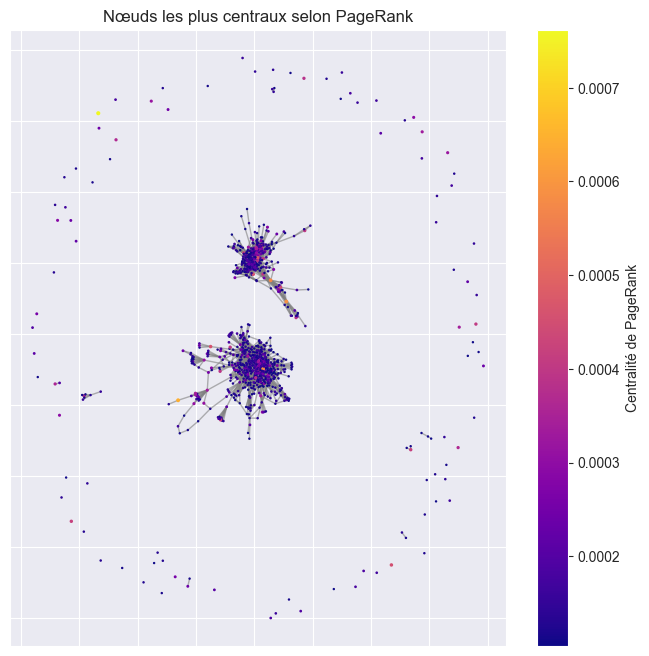

In [49]:
# Trier les nœuds par centralité PageRank (décroissant)
top_pagerank_nodes = sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)[:1000]
# Extraire les identifiants des nœuds les plus centraux
top_nodes = [node for node, _ in top_pagerank_nodes]

# Créer un sous-graphe basé sur ces nœuds
subgraph = G.subgraph(top_nodes)

# Tracer le sous-graphe
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(subgraph, seed=42)

# Tracer les nœuds avec une coloration basée sur PageRank
node_values = [pagerank_centrality[node] for node in subgraph.nodes()]
nodes = nx.draw_networkx_nodes(
    subgraph,
    pos,
    node_color=node_values,
    cmap='plasma',  # Choisir une colormap
    node_size=[pagerank_centrality[node] * 5000 for node in subgraph.nodes()],
    
)

# Tracer les arêtes et les étiquettes
nx.draw_networkx_edges(subgraph, pos, edge_color='gray', alpha=0.6)

# Ajouter une colorbar
plt.colorbar(nodes, label="Centralité de PageRank")

plt.title("Nœuds les plus centraux selon PageRank")
plt.show()

On ne voit pas vraiment mieux si on trace en classant par centralité, le nombre de noeuds étant trop grand, et les degrés étant souvent petits.